# The Street View House Numbers (SVHN) Dataset

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.


In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks.

Let us use the KNN classifier

#### KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.models import load_model, Sequential
from keras.layers import Dense, Reshape, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import tensorflow as tf

Using TensorFlow backend.


In [2]:
f = h5py.File('SVHN_single_grey1.h5')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [3]:
X_train = f['X_train']
X_test = f['X_test']
X_val = f['X_val']
y_train = f['y_train']
y_test = f['y_test']
y_val = f['y_val']

In [4]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)
(42000,)
(18000,)
(60000,)


- The training set has 42000 records of size 32 X 32
- The test set has 18000 records of size 32 X 32
- The validation set has 60000 records of size 32 X 32

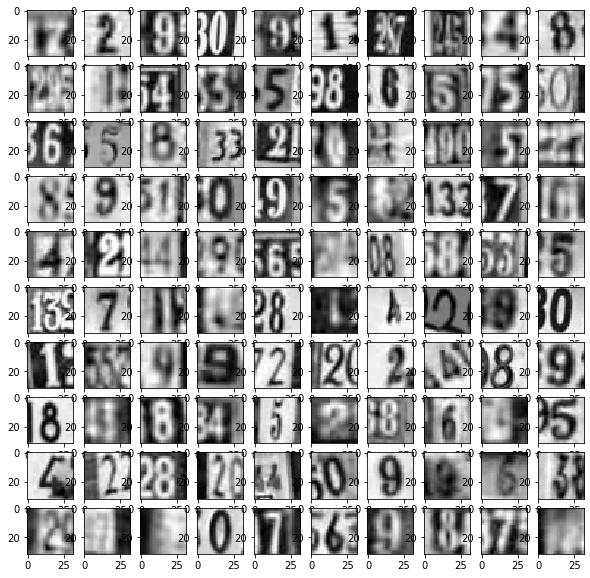

In [174]:
fig = plt.figure(figsize=(10,10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [166]:
X_tr = []
X_te = []
for i in range(X_train.shape[0]):
    X_tr.append(X_train[i,:].flatten())
for i in range(X_test.shape[0]):
    X_te.append(X_test[i,:].flatten())

In [167]:
print(len(X_tr), len(X_tr[0]))

42000 1024


In [168]:
class NN:
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.tr_x = X
        self.tr_y = y
    
    def predict(self, X):
        min_idx = None
        min_dist = 1000000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float(self.tr_x[test_sample][each_value] - X[each_value]))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]

In [169]:
knn = NN()
knn.train(X_tr, y_train)

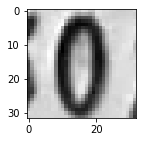

Predicted value =  0


In [175]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[94], cmap='gray')
plt.show()
print("Predicted value = ", knn.predict(X_te[94]))

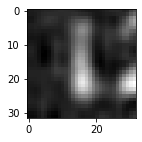

Predicted value =  1


In [176]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[56], cmap='gray')
plt.show()
print("Predicted value = ", knn.predict(X_te[56]))

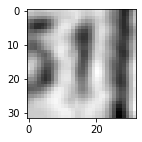

Predicted value =  5


In [177]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[33], cmap='gray')
plt.show()
print("Predicted value = ", knn.predict(X_te[33]))

##### Conclusion:
- Here with KNN we might get good result, but the time taken for predicting is very long. 
- Also, if there is any type of filtering applied to the image, then the KNN fails.

Let us use fully connected Neural Network to check how it works.

#### Neural Networks
Let us build a neural network with following architecture
1. Input layer
2. First Hidden Layer with 50 neurons and activation function as ReLU
3. Second Hidden Layer with 50 neurons and activation function as ReLU
4. Third Hidden Layer with 30 neurons and activation function as ReLU
5. The output layer with Softmax activation function
6. The optimizer used is the Adam Optimizer with learning rate 0.01
7. Since this is a multi class classification problem, the loss function suitable is the categorical crossentropy
8. We shall use the accuracy as the metrics

In [5]:
tf.keras.backend.clear_session()

- This is a multi class classification problem. There are a total of 10 class
- One for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10
- We need to encode it as one hot encoding with number of classes as 10

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Expected output should look like

In [7]:
print("The first 5 rows are: ",y_train[0:5])

The first 5 rows are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [56]:
# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [57]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32, shuffle='batch')

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 5s 121us/step - loss: 2.6627 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 2/15
42000/42000 [==============================] - 5s 115us/step - loss: 2.3033 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 3/15
42000/42000 [==============================] - 5s 117us/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 4/15
42000/42000 [==============================] - 5s 125us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 5/15
42000/42000 [==============================] - 5s 120us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 6/15
42000/42000 [==============================] - 5s 123us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 7/15
42000/42000 [==============================] - 5s 1

##### In the above Neural network model, adding Weight Initialization layer after the input layer and repeat the steps

In [59]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [67]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 5s 120us/step - loss: 9.0436 - accuracy: 0.1009 - val_loss: 2.3058 - val_accuracy: 0.0983
Epoch 2/15
42000/42000 [==============================] - 5s 114us/step - loss: 2.4791 - accuracy: 0.0989 - val_loss: 2.3038 - val_accuracy: 0.1008
Epoch 3/15
42000/42000 [==============================] - 5s 119us/step - loss: 2.3041 - accuracy: 0.0987 - val_loss: 2.3038 - val_accuracy: 0.0982
Epoch 4/15
42000/42000 [==============================] - 5s 116us/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.1007
Epoch 5/15
42000/42000 [==============================] - 5s 115us/step - loss: 2.3041 - accuracy: 0.0998 - val_loss: 2.3033 - val_accuracy: 0.1004
Epoch 6/15
42000/42000 [==============================] - 5s 115us/step - loss: 2.3040 - accuracy: 0.0999 - val_loss: 2.3034 - val_accuracy: 0.0955
Epoch 7/15
42000/42000 [==============================] - 5s 1

##### In the above Neural network model add Batch Normalization layer after the input layer and repeat the steps

In [65]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# Batch Normalization
model.add(BatchNormalization())

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Batch Normalization
model.add(BatchNormalization())

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Batch Normalization
model.add(BatchNormalization())

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [66]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 8s 181us/step - loss: 1.4708 - accuracy: 0.5021 - val_loss: 1.1281 - val_accuracy: 0.6408
Epoch 2/15
42000/42000 [==============================] - 7s 164us/step - loss: 1.0957 - accuracy: 0.6536 - val_loss: 1.0441 - val_accuracy: 0.6733
Epoch 3/15
42000/42000 [==============================] - 7s 167us/step - loss: 1.0120 - accuracy: 0.6816 - val_loss: 0.9263 - val_accuracy: 0.7081
Epoch 4/15
42000/42000 [==============================] - 7s 164us/step - loss: 0.9632 - accuracy: 0.6957 - val_loss: 0.8723 - val_accuracy: 0.7252
Epoch 5/15
42000/42000 [==============================] - 7s 166us/step - loss: 0.9181 - accuracy: 0.7110 - val_loss: 0.8292 - val_accuracy: 0.7453
Epoch 6/15
42000/42000 [==============================] - 7s 169us/step - loss: 0.8819 - accuracy: 0.7213 - val_loss: 0.7949 - val_accuracy: 0.7529
Epoch 7/15
42000/42000 [==============================] - 7s 1

- The model performance before adding batch normalization was very poor
- On adding the batch normalization the performance has improved significantly

##### Let us initialize weights on top of batch normalization

In [69]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))
model.add(BatchNormalization())


# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [70]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')

In [71]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle='batch', epochs=15)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 9s 212us/step - loss: 1.5705 - accuracy: 0.4647 - val_loss: 1.0676 - val_accuracy: 0.6670
Epoch 2/15
42000/42000 [==============================] - 9s 205us/step - loss: 1.1389 - accuracy: 0.6401 - val_loss: 1.0164 - val_accuracy: 0.6836
Epoch 3/15
42000/42000 [==============================] - 8s 185us/step - loss: 1.0265 - accuracy: 0.6760 - val_loss: 0.8732 - val_accuracy: 0.7298
Epoch 4/15
42000/42000 [==============================] - 7s 178us/step - loss: 0.9623 - accuracy: 0.6970 - val_loss: 0.8292 - val_accuracy: 0.7431
Epoch 5/15
42000/42000 [==============================] - 8s 186us/step - loss: 0.9107 - accuracy: 0.7124 - val_loss: 0.7946 - val_accuracy: 0.7558
Epoch 6/15
42000/42000 [==============================] - 7s 178us/step - loss: 0.8754 - accuracy: 0.7232 - val_loss: 0.7569 - val_accuracy: 0.7691
Epoch 7/15
42000/42000 [==============================] - 8s 1

- We can see that, on initializing the weights the training accuracy is about 77.3% and the test accuracy is about 80.10%

Let us build a neural network with following architecture

- Input layer
- First Hidden Layer with 100 neurons and activation function as ReLU
- Second Hidden Layer with 75 neurons and activation function as ReLU
- Third Hidden Layer with 50 neurons and activation function as ReLU
- The output layer with Softmax activation function
- The optimizer used is the Adam Optimizer with learning rate 0.01
- Using Batch Normalization in each layer
- Adding weight initialization in each layer
- Adding Dense layers with 0.4 as dropout factor
- Since this is a multi class classification problem, the loss function suitable is the categorical crossentropy
We shall use the accuracy as the metrics

In [50]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))
model.add(BatchNormalization())


# First Hidden Layer with 100 neurons and activation function as ReLU
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Second Hidden Layer with 75 neurons and activation function as ReLU
model.add(Dense(75, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Third Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [51]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle='batch', epochs=15)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 9s 225us/step - loss: 2.1125 - accuracy: 0.2724 - val_loss: 1.4038 - val_accuracy: 0.5792
Epoch 2/15
42000/42000 [==============================] - 11s 259us/step - loss: 1.5622 - accuracy: 0.4723 - val_loss: 1.1470 - val_accuracy: 0.6574
Epoch 3/15
42000/42000 [==============================] - 9s 214us/step - loss: 1.3737 - accuracy: 0.5523 - val_loss: 0.9704 - val_accuracy: 0.7218
Epoch 4/15
42000/42000 [==============================] - 10s 227us/step - loss: 1.2425 - accuracy: 0.6038 - val_loss: 0.8758 - val_accuracy: 0.7375
Epoch 5/15
42000/42000 [==============================] - 9s 219us/step - loss: 1.1525 - accuracy: 0.6392 - val_loss: 0.7924 - val_accuracy: 0.7683
Epoch 6/15
42000/42000 [==============================] - 8s 197us/step - loss: 1.0746 - accuracy: 0.6662 - val_loss: 0.7591 - val_accuracy: 0.7747
Epoch 7/15
42000/42000 [==============================] - 8s

###### Test Data Report

In [53]:
y_pred = model.predict_classes(X_test)
y_actual = f['y_test']
accuracy = model.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 74us/step


In [55]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Test Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 83.22%
Classification Metric For Test Data:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1814
           1       0.79      0.87      0.83      1828
           2       0.88      0.82      0.85      1803
           3       0.82      0.79      0.80      1719
           4       0.87      0.85      0.86      1812
           5       0.83      0.83      0.83      1768
           6       0.83      0.80      0.82      1832
           7       0.86      0.88      0.87      1808
           8       0.74      0.82      0.78      1812
           9       0.86      0.79      0.83      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



###### Validation Data Report

In [56]:
y_pred = model.predict_classes(X_val)
y_actual = f['y_val']
accuracy = model.evaluate(X_val,tf.keras.utils.to_categorical(y_actual))

60000/60000 [==============================] - 4s 68us/step


In [57]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Test Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 84.34%
Classification Metric For Test Data:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6000
           1       0.79      0.88      0.83      6000
           2       0.90      0.84      0.87      6000
           3       0.85      0.79      0.82      6000
           4       0.88      0.86      0.87      6000
           5       0.84      0.83      0.83      6000
           6       0.84      0.82      0.83      6000
           7       0.87      0.90      0.88      6000
           8       0.76      0.83      0.79      6000
           9       0.87      0.81      0.84      6000

    accuracy                           0.84     60000
   macro avg       0.85      0.84      0.84     60000
weighted avg       0.85      0.84      0.84     60000



#### Let us compare this result with neural network architecture by removing the dropout layers and rmsprop optimizer

In [66]:
tf.keras.backend.clear_session()

# Initialize the sequential model
clf = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
clf.add(Reshape((1024,), input_shape=((32,32,))))
clf.add(BatchNormalization())


# First Hidden Layer with 100 neurons and activation function as ReLU
clf.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
clf.add(BatchNormalization())

# Second Hidden Layer with 75 neurons and activation function as ReLU
clf.add(Dense(75, activation='relu', kernel_initializer='he_normal'))
clf.add(BatchNormalization())

# Third Hidden Layer with 50 neurons and activation function as ReLU
clf.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
clf.add(BatchNormalization())

# The output layer with Softmax activation function
clf.add(Dense(10, activation='softmax'))

In [67]:
clf.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
clf.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle='batch', epochs=15)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 8s 191us/step - loss: 1.4887 - accuracy: 0.5069 - val_loss: 1.0482 - val_accuracy: 0.6774
Epoch 2/15
42000/42000 [==============================] - 7s 174us/step - loss: 1.0891 - accuracy: 0.6515 - val_loss: 0.9177 - val_accuracy: 0.7120
Epoch 3/15
42000/42000 [==============================] - 8s 180us/step - loss: 0.9473 - accuracy: 0.6989 - val_loss: 0.7972 - val_accuracy: 0.7551
Epoch 4/15
42000/42000 [==============================] - 9s 206us/step - loss: 0.8632 - accuracy: 0.7252 - val_loss: 0.7616 - val_accuracy: 0.7652
Epoch 5/15
42000/42000 [==============================] - 8s 181us/step - loss: 0.8067 - accuracy: 0.7455 - val_loss: 0.7397 - val_accuracy: 0.7797
Epoch 6/15
42000/42000 [==============================] - 8s 182us/step - loss: 0.7606 - accuracy: 0.7601 - val_loss: 0.6686 - val_accuracy: 0.7982
Epoch 7/15
42000/42000 [==============================] - 8s 1

###### Test Data Report

In [69]:
y_pred = clf.predict_classes(X_test)
y_actual = f['y_test']
accuracy = clf.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 74us/step


In [70]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Test Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 82.08%
Classification Metric For Test Data:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1814
           1       0.81      0.85      0.83      1828
           2       0.79      0.83      0.81      1803
           3       0.76      0.78      0.77      1719
           4       0.87      0.85      0.86      1812
           5       0.79      0.82      0.80      1768
           6       0.85      0.79      0.82      1832
           7       0.85      0.87      0.86      1808
           8       0.78      0.78      0.78      1812
           9       0.87      0.76      0.81      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



###### Validation Data Report

In [71]:
y_pred = clf.predict_classes(X_val)
y_actual = f['y_val']
accuracy = clf.evaluate(X_val,tf.keras.utils.to_categorical(y_actual))

60000/60000 [==============================] - 4s 69us/step


In [72]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Validation Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 84.8%
Classification Metric For Validation Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6000
           1       0.83      0.88      0.85      6000
           2       0.82      0.87      0.84      6000
           3       0.81      0.82      0.81      6000
           4       0.89      0.87      0.88      6000
           5       0.82      0.84      0.83      6000
           6       0.87      0.81      0.84      6000
           7       0.88      0.90      0.89      6000
           8       0.81      0.81      0.81      6000
           9       0.90      0.80      0.85      6000

    accuracy                           0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



#### Using Stochastic Gradient Descent as optimizer

In [58]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))
model.add(BatchNormalization())


# First Hidden Layer with 100 neurons and activation function as ReLU
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Second Hidden Layer with 75 neurons and activation function as ReLU
model.add(Dense(75, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Third Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle='batch', epochs=15)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 8s 194us/step - loss: 1.7928 - accuracy: 0.3953 - val_loss: 1.2670 - val_accuracy: 0.6119
Epoch 2/15
42000/42000 [==============================] - 7s 163us/step - loss: 1.2898 - accuracy: 0.5835 - val_loss: 1.0797 - val_accuracy: 0.6706
Epoch 3/15
42000/42000 [==============================] - 7s 160us/step - loss: 1.1430 - accuracy: 0.6349 - val_loss: 0.9950 - val_accuracy: 0.6893
Epoch 4/15
42000/42000 [==============================] - 7s 171us/step - loss: 1.0545 - accuracy: 0.6626 - val_loss: 0.9339 - val_accuracy: 0.7088
Epoch 5/15
42000/42000 [==============================] - 7s 172us/step - loss: 0.9926 - accuracy: 0.6824 - val_loss: 0.8973 - val_accuracy: 0.7216
Epoch 6/15
42000/42000 [==============================] - 7s 161us/step - loss: 0.9380 - accuracy: 0.7034 - val_loss: 0.8234 - val_accuracy: 0.7503
Epoch 7/15
42000/42000 [==============================] - 7s 1

###### Test Data Report

In [61]:
y_pred = model.predict_classes(X_test)
y_actual = f['y_test']
accuracy = model.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 69us/step


In [63]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Test Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 78.7%
Classification Metric For Test Data:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1814
           1       0.80      0.81      0.80      1828
           2       0.80      0.79      0.80      1803
           3       0.78      0.72      0.74      1719
           4       0.84      0.79      0.82      1812
           5       0.77      0.79      0.78      1768
           6       0.74      0.80      0.77      1832
           7       0.83      0.84      0.83      1808
           8       0.74      0.73      0.74      1812
           9       0.76      0.78      0.77      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



###### Validation Data Report

In [64]:
y_pred = model.predict_classes(X_val)
y_actual = f['y_val']
accuracy = model.evaluate(X_val,tf.keras.utils.to_categorical(y_actual))

60000/60000 [==============================] - 4s 68us/step


In [65]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Validation Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 81.33%
Classification Metric For Validation Data:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      6000
           1       0.82      0.83      0.83      6000
           2       0.84      0.82      0.83      6000
           3       0.81      0.74      0.77      6000
           4       0.86      0.82      0.84      6000
           5       0.80      0.80      0.80      6000
           6       0.76      0.82      0.79      6000
           7       0.86      0.86      0.86      6000
           8       0.76      0.77      0.76      6000
           9       0.79      0.82      0.81      6000

    accuracy                           0.81     60000
   macro avg       0.81      0.81      0.81     60000
weighted avg       0.81      0.81      0.81     60000



## Summary

1. The model with characteristics
 ```
    - Input layer
    - First Hidden Layer with 100 neurons and activation function as ReLU
    - Second Hidden Layer with 75 neurons and activation function as ReLU
    - Third Hidden Layer with 50 neurons and activation function as ReLU
    - The output layer with Softmax activation function
    - The optimizer used is the rmsprop Optimizer with learning rate 0.001
    - Using Batch Normalization in each layer
    - Adding weight initialization in each layer
    - Since this is a multi class classification problem, the loss function suitable is the categorical crossentropy We shall use the accuracy as the metrics
```
is the best model. According to the metrics and the reports we see that,
    - The training accuracy is 82.27%
    - The testing accuracy is 82.08%
    - The validation accuracy is 84.8%
    
<br>

2. The model summary is as follows

In [73]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
batch_normalization_3 (Batch (None, 75)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

3. Problems with KNN<br>
   i. Need to remember all the training data and store it for future comparision with the test data. This will be time consuming as image in test should be compared with all the images of the training set.<br>
   ii. It is space consuming.<br>
   iii. Can be easily fooled by irrelevent attributes

4. Before applying batch normalization the accuracy was very poor ~10%. After applying batch normalization, the accuracy increased to more than 75%

5. Adding Droput layer, the model accuracy reduced by ~2%.